In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We consider n rays and 4 planes. initial plane, primary plane, final plane, image plane.
Ray stored in tensor of this form:
$$R=\begin{bmatrix}(x^i,y_1^i)& (x^p,y_1^p)&(x^s,y_1^s)&(x^f,y_1^f)\\(x^i,y_2^i)& (x^p,y_2^p)&(x^s,y_2^s)&(x^f,y_2^f)\\\vdots&\vdots&\vdots&\vdots\\(x^i,y_n^i)& (x^p,y_n^p)&(x^s,y_n^s)&(x^f,y_n^f)\end{bmatrix}$$

We begin with a set of values $y^i, y^p$ which specify the initial directions of the rays.We also know the positions $x^i,x^p,x^s,x^f$ and the focal lengths $f_s,f_p$ The primary convex lens carries out the ray transformation:
$$T_p=\frac{1}{((y^p)^{2}+f_p^2)^{1/2}}\begin{pmatrix}f_p&y^p\\-y^p&f_p\end{pmatrix}$$
Where $f$ is the focal length and $y^p$ is the position above the axis at which the ray meets the lens.

To compute the $y^s$ values, we first find the incoming ray vector:
$$\mathbf r_i = \frac{1}{[(x^p-x^i)^2+(y^p-y^i)^2]^{1/2}}\begin{pmatrix}x^p-x^i\\y^p-y^i\end{pmatrix}$$
Then find the outgoing ray vector:

$$\mathbf r_o=\frac{1}{((y^p)^2+f_p^2)^{1/2}}\frac{1}{[(x^p-x^i)^2+(y^p-y^i)^2]^{1/2}}\begin{pmatrix}f_p&y^p\\-y^p&f_p\end{pmatrix}\begin{pmatrix}x^p-x^i\\y^p-y^i\end{pmatrix}=\begin{pmatrix}a\\b\end{pmatrix}$$
This will be normalised, so we can just find the desired values like this:
$$\begin{pmatrix}x^s\\y^s\end{pmatrix}=\begin{pmatrix}x^p\\y^p\end{pmatrix}+(x^s-x^p)\begin{pmatrix}a\\b\end{pmatrix}$$

This process can be repeated for the secondary lens too, changing to the variables:
$$(f_p,x^i,y^i,x^p,y^p,x^s,y^s)\to(f_s,x^p,y^p,x^s,y^s,x^f,y^f)$$

[ 0.88432767 -0.46686675]
[ 0.91930641 -0.39354252]
[ 0.95346259 -0.30151134]
[ 0.98130676 -0.19245009]
[ 0.99734787 -0.0727821 ]
[0.99887069 0.04751143]
[0.98733635 0.15864086]


(0.0, 15.0)

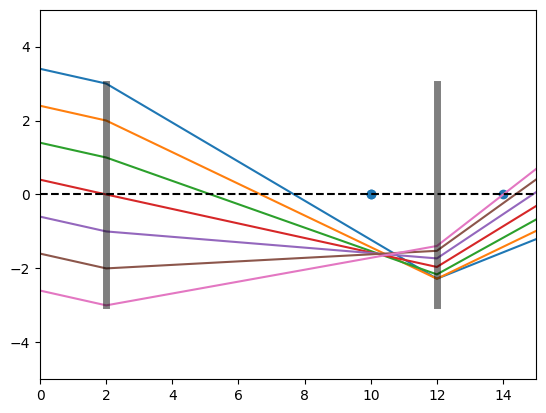

In [ ]:
x_i, x_p, x_s, x_f = 0.0, 2.0, 12.0, 15.0
delta = -0.4
x_vals = np.array([x_i, x_p, x_s, x_f])
y_i = np.array([3-delta,2-delta,1-delta,-delta,-1-delta,-2-delta,-3-delta])
y_p = np.array([3.0,2.0,1.0,0.0,-1.0,-2.0,-3.0])
y_s = np.zeros(7)
y_f = np.zeros(7)
f_p = 8
f_s = 2

# Primary lens transformation:
for i in range(len(y_i)):
  T_p = (y_p[i]**2+f_p**2)**(-0.5)*np.array([[f_p, y_p[i]],[-y_p[i],f_p]])
  r_i = ((x_p-x_i)**2+(y_p[i]-y_i[i])**2)**(-1/2)*np.array([x_p-x_i,(y_p[i]-y_i[i])])
  r_o = np.matmul(T_p,r_i)
  y_s[i]=y_p[i]+(x_s-x_p)*r_o[1]

# Secondary Lens transformation
for i in range(len(y_i)):
  T_s = (y_s[i]**2+f_s**2)**(-0.5)*np.array([[f_s, y_s[i]],[-y_s[i],f_s]])
  r_i = ((x_s-x_p)**2+(y_s[i]-y_p[i])**2)**(-1/2)*np.array([x_s-x_p,(y_s[i]-y_p[i])])
  print(r_i)
  r_o = np.matmul(T_s,r_i)
  y_f[i]=y_s[i]+(x_f-x_s)*r_o[1]


plt.plot(x_vals,np.concatenate([[y_i],[y_p],[y_s],[y_f]]))

plt.plot(x_vals, np.zeros(4), linestyle='--', c='black') #optical axis
plt.plot([x_vals[1],x_vals[1]],[3,-3], linewidth=5, c='black',alpha=0.5) #primary lens
plt.plot([x_vals[2],x_vals[2]],[3,-3], linewidth=5, c='black',alpha=0.5) #secondary lens
plt.scatter([x_vals[1]-f_p,x_vals[1]+f_p,x_vals[2]-f_s,x_vals[2]+f_s],[0,0,0,0]) # Focal points

plt.ylim(-5,5)
plt.xlim(0,15)